In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


# Reading first dataset

In [2]:
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [4]:
df['month'] = df['dt'].map(lambda x: x[5:7])

In [5]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,11
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,12
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,01
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,02
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,03


In [6]:
# Convert 'StringColumn' to integer
df['month'] = df['month'].astype(int)

In [7]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,month
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,11
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,12
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,2
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,3


In [8]:
df.shape

(8599212, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
 7   month                          int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 492.1+ MB


In [10]:
columns_to_drop = [ 'dt','AverageTemperatureUncertainty']  # Replace with the names of the columns you want to drop

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [11]:
null_values = df.isnull().sum()
print(null_values)

AverageTemperature    364130
City                       0
Country                    0
Latitude                   0
Longitude                  0
month                      0
dtype: int64


In [12]:
(df['AverageTemperature'].isnull().sum() / len(df))*100

4.234457761943769

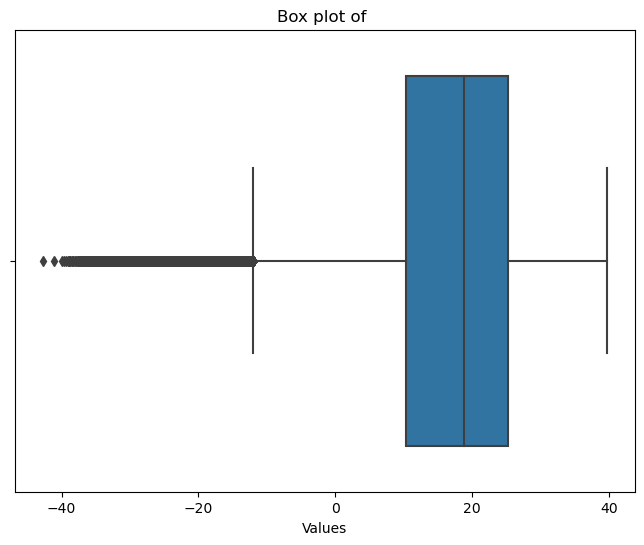

In [13]:
import seaborn as sns
import pandas as pd

# Create a box plot using Seaborn for a specific column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=df["AverageTemperature"])  # Create the box plot for the specific column using Seaborn
plt.title('Box plot of ' )  # Set the title
plt.xlabel('Values')  # Set the label for x-axis
plt.show()  # Show the plot


In [14]:
median_value = df['AverageTemperature'].median()

# Fill missing values in the column with the median
df['AverageTemperature'].fillna(median_value, inplace=True)

In [15]:
df.head()

,AverageTemperature,City,Country,Latitude,Longitude,month
0,6.068,Århus,Denmark,57.05N,10.33E,11
1,18.831,Århus,Denmark,57.05N,10.33E,12
2,18.831,Århus,Denmark,57.05N,10.33E,1
3,18.831,Århus,Denmark,57.05N,10.33E,2
4,18.831,Århus,Denmark,57.05N,10.33E,3


In [16]:
(df.duplicated().sum() / len(df))*100

6.5370640937797555

In [17]:
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
         AverageTemperature    City      Country Latitude Longitude  month
21                   18.831   Århus      Denmark   57.05N    10.33E      8
25                   18.831   Århus      Denmark   57.05N    10.33E     12
26                   18.831   Århus      Denmark   57.05N    10.33E      1
27                   18.831   Århus      Denmark   57.05N    10.33E      2
28                   18.831   Århus      Denmark   57.05N    10.33E      3
...                     ...     ...          ...      ...       ...    ...
8599183              14.066  Zwolle  Netherlands   52.24N     5.26E      5
8599199              14.333  Zwolle  Netherlands   52.24N     5.26E      9
8599203               1.479  Zwolle  Netherlands   52.24N     5.26E      1
8599208              15.043  Zwolle  Netherlands   52.24N     5.26E      6
8599211              18.831  Zwolle  Netherlands   52.24N     5.26E      9

[562136 rows x 6 columns]


In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.head()

,AverageTemperature,City,Country,Latitude,Longitude,month
0,6.068,Århus,Denmark,57.05N,10.33E,11
1,18.831,Århus,Denmark,57.05N,10.33E,12
2,18.831,Århus,Denmark,57.05N,10.33E,1
3,18.831,Århus,Denmark,57.05N,10.33E,2
4,18.831,Århus,Denmark,57.05N,10.33E,3


In [21]:
len(df['Country'].unique())

159

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'City' column
df['City_encoded'] = label_encoder.fit_transform(df['City'])

# Apply LabelEncoder to 'Country' column
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

# Display the DataFrame with encoded columns
df

,AverageTemperature,City,Country,Latitude,Longitude,month,City_encoded,Country_encoded
0,6.068,Århus,Denmark,57.05N,10.33E,11,3443,39
1,18.831,Århus,Denmark,57.05N,10.33E,12,3443,39
2,18.831,Århus,Denmark,57.05N,10.33E,1,3443,39
3,18.831,Århus,Denmark,57.05N,10.33E,2,3443,39
4,18.831,Århus,Denmark,57.05N,10.33E,3,3443,39
...,...,...,...,...,...,...,...,...
8599205,2.253,Zwolle,Netherlands,52.24N,5.26E,3,3442,100
8599206,7.710,Zwolle,Netherlands,52.24N,5.26E,4,3442,100
8599207,11.464,Zwolle,Netherlands,52.24N,5.26E,5,3442,100
8599209,18.775,Zwolle,Netherlands,52.24N,5.26E,7,3442,100


In [23]:
columns_to_drop = [ 'City','Country']  # Replace with the names of the columns you want to drop

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)
df

,AverageTemperature,Latitude,Longitude,month,City_encoded,Country_encoded
0,6.068,57.05N,10.33E,11,3443,39
1,18.831,57.05N,10.33E,12,3443,39
2,18.831,57.05N,10.33E,1,3443,39
3,18.831,57.05N,10.33E,2,3443,39
4,18.831,57.05N,10.33E,3,3443,39
...,...,...,...,...,...,...
8599205,2.253,52.24N,5.26E,3,3442,100
8599206,7.710,52.24N,5.26E,4,3442,100
8599207,11.464,52.24N,5.26E,5,3442,100
8599209,18.775,52.24N,5.26E,7,3442,100


In [24]:
df['Latitude'] = df['Latitude'].map(lambda x: x[:-1])

In [25]:
df['Longitude'] = df['Longitude'].map(lambda x: x[:-1])

In [26]:
df.head()

,AverageTemperature,Latitude,Longitude,month,City_encoded,Country_encoded
0,6.068,57.05,10.33,11,3443,39
1,18.831,57.05,10.33,12,3443,39
2,18.831,57.05,10.33,1,3443,39
3,18.831,57.05,10.33,2,3443,39
4,18.831,57.05,10.33,3,3443,39


In [27]:
df.dtypes

AverageTemperature    float64
Latitude               object
Longitude              object
month                   int32
City_encoded            int32
Country_encoded         int32
dtype: object

In [28]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
df

,AverageTemperature,Latitude,Longitude,month,City_encoded,Country_encoded
0,6.068,57.05,10.33,11,3443,39
1,18.831,57.05,10.33,12,3443,39
2,18.831,57.05,10.33,1,3443,39
3,18.831,57.05,10.33,2,3443,39
4,18.831,57.05,10.33,3,3443,39
...,...,...,...,...,...,...
8599205,2.253,52.24,5.26,3,3442,100
8599206,7.710,52.24,5.26,4,3442,100
8599207,11.464,52.24,5.26,5,3442,100
8599209,18.775,52.24,5.26,7,3442,100


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8037076 entries, 0 to 8599210
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   AverageTemperature  float64
 1   Latitude            float64
 2   Longitude           float64
 3   month               int32  
 4   City_encoded        int32  
 5   Country_encoded     int32  
dtypes: float64(3), int32(3)
memory usage: 337.2 MB


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be scaled
columns_to_scale = ['City_encoded', 'Country_encoded']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the DataFrame with scaled columns
df

,AverageTemperature,Latitude,Longitude,month,City_encoded,Country_encoded
0,6.068,57.05,10.33,11,0.998840,0.246835
1,18.831,57.05,10.33,12,0.998840,0.246835
2,18.831,57.05,10.33,1,0.998840,0.246835
3,18.831,57.05,10.33,2,0.998840,0.246835
4,18.831,57.05,10.33,3,0.998840,0.246835
...,...,...,...,...,...,...
8599205,2.253,52.24,5.26,3,0.998549,0.632911
8599206,7.710,52.24,5.26,4,0.998549,0.632911
8599207,11.464,52.24,5.26,5,0.998549,0.632911
8599209,18.775,52.24,5.26,7,0.998549,0.632911


# Linear Regression Model

In [31]:
X = df.drop('AverageTemperature',axis=1)
y = df['AverageTemperature']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)
linearRegression_train_predictions = linearRegression_model.predict(X_train)

# Evaluate the model
lr_train_mse = mean_squared_error(y_train, linearRegression_train_predictions)
lr_train_r2 = r2_score(y_train, linearRegression_train_predictions)

print("Mean Squared Error:", lr_train_mse)
print("R-squared (R2) Score:", lr_train_r2)

Mean Squared Error: 57.06898971955868
R-squared (R2) Score: 0.46863537700808333


In [34]:
linear_test_predictions = linearRegression_model.predict(X_test)

# Evaluate the model
lr_test_mse = mean_squared_error(y_test, linear_test_predictions)
lr_test_r2 = r2_score(y_test, linear_test_predictions)

print("Mean Squared Error:", lr_test_mse)
print("R-squared (R2) Score:", lr_test_r2)

Mean Squared Error: 57.13401312952811
R-squared (R2) Score: 0.468328455316802


In [35]:
print(linear_test_predictions)

[22.82211218  8.13024417 21.71945918 ... 12.82034758 18.54309154
 16.62787088]


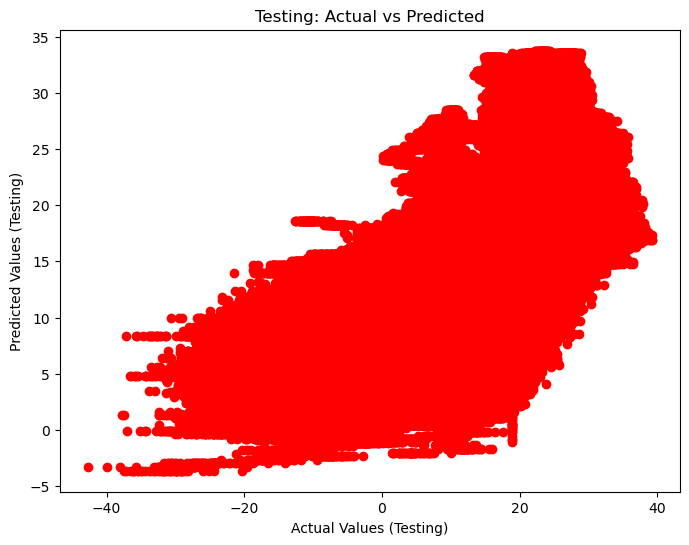

In [36]:
# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_test_predictions, color='red')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing: Actual vs Predicted')
plt.show()

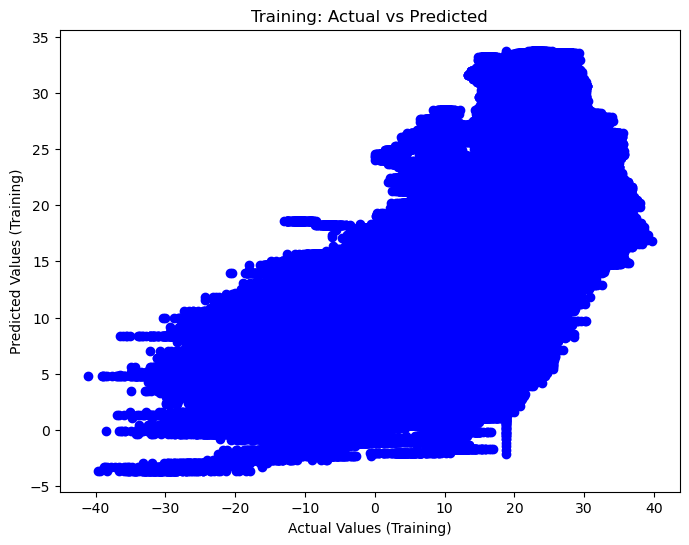

In [37]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, linearRegression_train_predictions, color='blue')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training: Actual vs Predicted')
plt.show()

# Decision Tree

In [38]:

desicionTree_model = DecisionTreeRegressor(random_state=42)  
desicionTree_model.fit(X_train, y_train)  

# Make predictions
desicionTree_predictions = desicionTree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, desicionTree_predictions)
r2 = r2_score(y_test, desicionTree_predictions)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 2.139798903857509
R-squared (R2) Score: 0.9800876898679227


In [39]:
# Make predictions
desicionTree_train_predictions = desicionTree_model.predict(X_train)

# Evaluate the model
mse_Opaaa = mean_squared_error(y_train, desicionTree_train_predictions)
r2_Opaaa = r2_score(y_train, desicionTree_train_predictions)

print("Mean Squared Error:", mse_Opaaa)
print("R-squared (R2) Score:", r2_Opaaa)

Mean Squared Error: 2.122224311355506
R-squared (R2) Score: 0.9802401457140002


In [40]:
print(desicionTree_predictions)

[20.3856     -2.81864407 31.36484247 ... 17.61807101 20.11703571
 10.24941964]


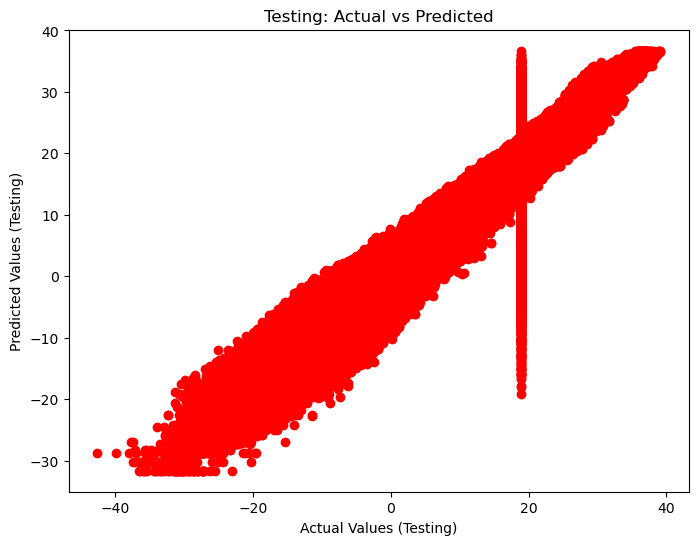

In [41]:
# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, desicionTree_predictions, color='red')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing: Actual vs Predicted')
plt.show()

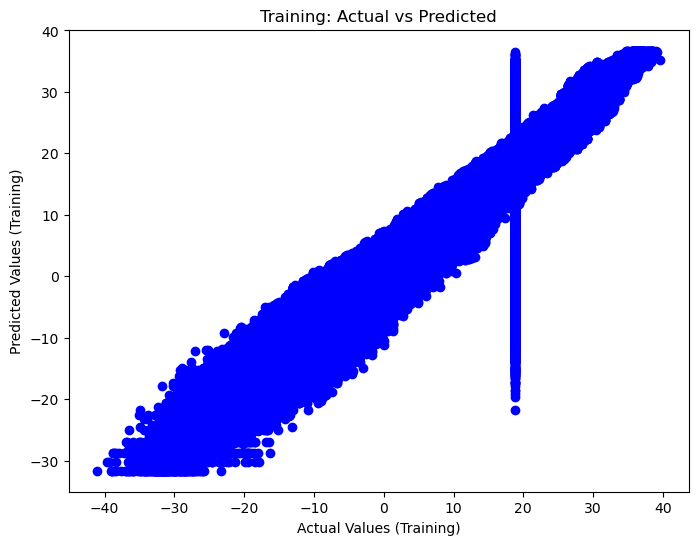

In [42]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, desicionTree_train_predictions, color='blue')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training: Actual vs Predicted')
plt.show()

# XGboost

In [43]:
# Convert data into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

# Train the XGBoost model
num_round = 100  # Number of boosting iterations
xgboost_model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
xgboost_predictions= xgboost_model.predict(dtest)

# Evaluate model performance
mse = mean_squared_error(y_test, xgboost_predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, xgboost_predictions)
print("r2s:", r2)


Mean Squared Error: 3.31852383934755
r2s: 0.9691188383400628


In [44]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a trained XGBoost model named 'xgboost_model'

# Convert X_train to DMatrix
dtrain = xgb.DMatrix(X_train)

# Make predictions
xgboost_train_predictions = xgboost_model.predict(dtrain)

# Evaluate the model
mse_Opaaa = mean_squared_error(y_train, xgboost_train_predictions)
r2_Opaaa = r2_score(y_train, xgboost_train_predictions)

print("Mean Squared Error:", mse_Opaaa)
print("R-squared (R2) Score:", r2_Opaaa)


Mean Squared Error: 3.3178895147782543
R-squared (R2) Score: 0.9691074063197449


In [45]:
print(xgboost_predictions)

[20.789906  -2.2574694 29.459858  ... 17.467888  18.490154   9.794207 ]


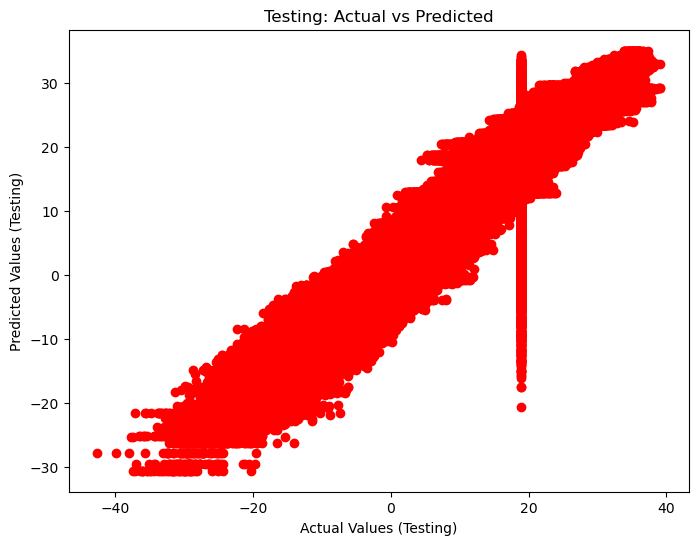

In [46]:
# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgboost_predictions, color='red')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing: Actual vs Predicted')
plt.show()

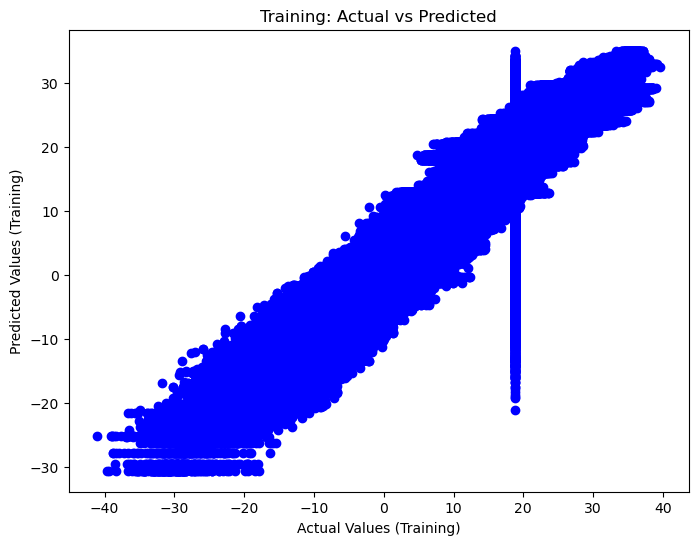

In [47]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, xgboost_train_predictions, color='blue')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training: Actual vs Predicted')
plt.show()

# LightGBM

In [48]:
# Convert data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define parameters for the LightGBM model
params = {
    'objective': 'regression',  # Regression task
    'metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'verbosity': -1  # Suppress informational messages
}

# Train the LightGBM model
num_round = 100  # Number of boosting iterations
lightgbm_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])
# Make predictions on the test set
lightgbm_predictions= lightgbm_model.predict(X_test, num_iteration=lightgbm_model.best_iteration)

# Evaluate model performance
mse = mean_squared_error(y_test, lightgbm_predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, lightgbm_predictions)
print("R^2 Score:", r2)


Mean Squared Error: 5.072726267481065
R^2 Score: 0.9527947703538295


In [49]:
# Make predictions
LightGBM_train_predictions = lightgbm_model.predict(X_train)

# Evaluate the model
mse_Opaaa = mean_squared_error(y_train, LightGBM_train_predictions)
r2_Opaaa = r2_score(y_train, LightGBM_train_predictions)

print("Mean Squared Error:", mse_Opaaa)
print("R-squared (R2) Score:", r2_Opaaa)

Mean Squared Error: 5.077523732701679
R-squared (R2) Score: 0.9527235982760902


In [50]:
print(lightgbm_predictions)

[21.22932275 -2.07652584 28.90479475 ... 17.60859386 18.11185336
 12.96350876]


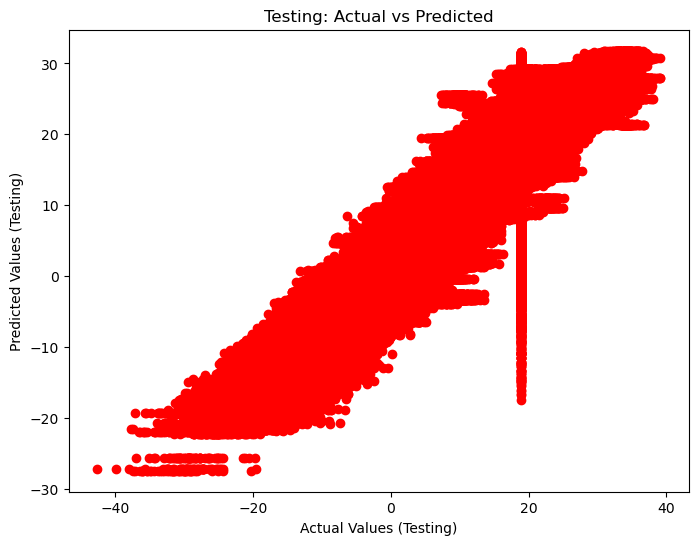

In [51]:
# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lightgbm_predictions, color='red')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing: Actual vs Predicted')
plt.show()

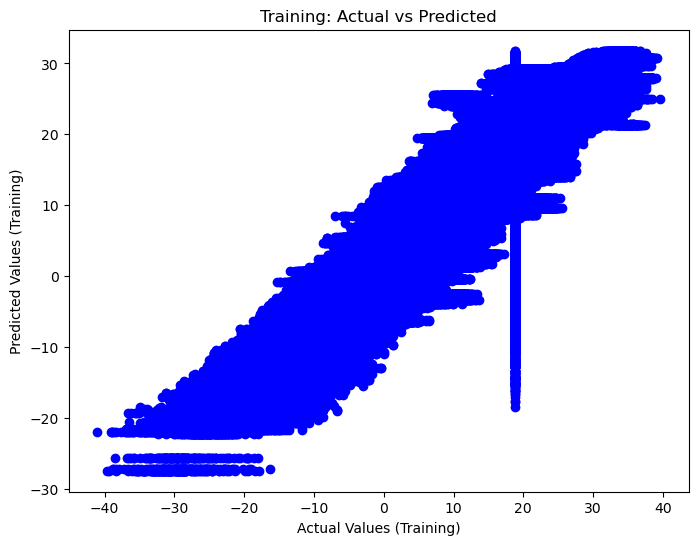

In [52]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, LightGBM_train_predictions, color='blue')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training: Actual vs Predicted')
plt.show()

# LSTM

In [53]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'data' is your time series data
# Reshape the data to fit the LSTM input shape (samples, time steps, features)
# Example reshaping for a univariate time series
data = np.array([i for i in range(100)])
data = data.reshape((len(data), 1))

# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Convert time series data into input-output pairs
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 10  # Define the number of time steps
X, y = create_dataset(data_normalized, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
print("Mean Squared Error:", mse)





Epoch 1/100

3/3 [==============================] - 6s 22ms/step - loss: 0.2278
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1424
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0692
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0150
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0086
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0272
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0112
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0022
Epoch 9/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0060
Epoch 10/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0086
Epoch 11/100
3/3 [==============================] - 0s 15ms/step - loss: 0.0062
Epoch 12/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 13/100
3/3 [============================

In [54]:
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error (MSE)
train_mse = r2_score(y_train, y_train_pred)
print(f"Mean Squared Error (MSE) on training data: {train_mse}")

3/3 [==============================] - 0s 8ms/step
Mean Squared Error (MSE) on training data: 0.9997412016909925


In [55]:
print(predictions)

[[82.413666]
 [83.42653 ]
 [84.43783 ]
 [85.44748 ]
 [86.4554  ]
 [87.46151 ]
 [88.46571 ]
 [89.46795 ]
 [90.46814 ]
 [91.46618 ]
 [92.46202 ]
 [93.45556 ]
 [94.44673 ]
 [95.435486]
 [96.42169 ]
 [97.40532 ]
 [98.38629 ]
 [99.36453 ]]


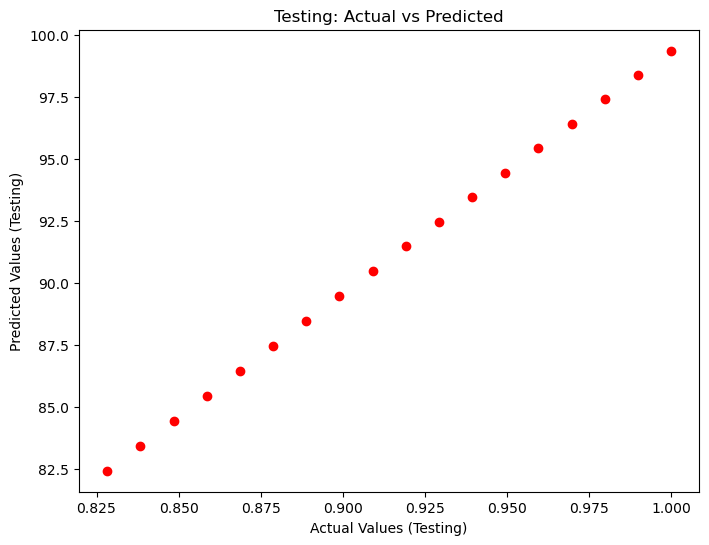

In [56]:
# Scatter plot for testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='red')
plt.xlabel('Actual Values (Testing)')
plt.ylabel('Predicted Values (Testing)')
plt.title('Testing: Actual vs Predicted')
plt.show()

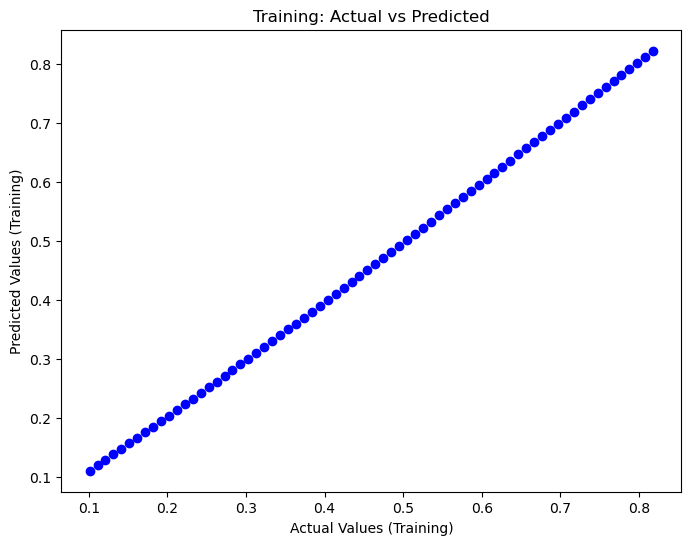

In [57]:
import matplotlib.pyplot as plt


# Scatter plot for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Actual Values (Training)')
plt.ylabel('Predicted Values (Training)')
plt.title('Training: Actual vs Predicted')
plt.show()

# Role based temp.

In [58]:
import pandas as pd


df = pd.DataFrame(df)

def categorize_temperature(temp):
    if temp < 10:
        return 'Very Cold'
    elif 10 <= temp < 20:
        return 'Cold'
    elif 20 <= temp < 30:
        return 'Moderate'
    else:
        return 'Hot'

# Apply the function to create new columns for temperature categories
temperature_columns = [col for col in df.columns if 'AverageTemperature' in col]
for col in temperature_columns:
    df[col + '_category'] = df[col].apply(categorize_temperature)



In [59]:
df

,AverageTemperature,Latitude,Longitude,month,City_encoded,Country_encoded,AverageTemperature_category
0,6.068,57.05,10.33,11,0.998840,0.246835,Very Cold
1,18.831,57.05,10.33,12,0.998840,0.246835,Cold
2,18.831,57.05,10.33,1,0.998840,0.246835,Cold
3,18.831,57.05,10.33,2,0.998840,0.246835,Cold
4,18.831,57.05,10.33,3,0.998840,0.246835,Cold
...,...,...,...,...,...,...,...
8599205,2.253,52.24,5.26,3,0.998549,0.632911,Very Cold
8599206,7.710,52.24,5.26,4,0.998549,0.632911,Very Cold
8599207,11.464,52.24,5.26,5,0.998549,0.632911,Cold
8599209,18.775,52.24,5.26,7,0.998549,0.632911,Cold


In [60]:
df['AverageTemperature_category'].unique()

array(['Very Cold', 'Cold', 'Moderate', 'Hot'], dtype=object)

In [61]:
column_name = 'AverageTemperature'
df = df.drop(column_name, axis=1) 

In [62]:
df.head()

,Latitude,Longitude,month,City_encoded,Country_encoded,AverageTemperature_category
0,57.05,10.33,11,0.99884,0.246835,Very Cold
1,57.05,10.33,12,0.99884,0.246835,Cold
2,57.05,10.33,1,0.99884,0.246835,Cold
3,57.05,10.33,2,0.99884,0.246835,Cold
4,57.05,10.33,3,0.99884,0.246835,Cold


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_class = df.drop('AverageTemperature_category',axis=1)
y_class = df['AverageTemperature_category']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions on the test set
predictions = dt_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9389014994257863
Classification Report:
              precision    recall  f1-score   support

        Cold       0.91      0.91      0.91    724960
         Hot       0.88      0.83      0.86     76072
    Moderate       0.95      0.95      0.95   1017418
   Very Cold       0.95      0.96      0.96    592673

    accuracy                           0.94   2411123
   macro avg       0.92      0.91      0.92   2411123
weighted avg       0.94      0.94      0.94   2411123



In [64]:
print(predictions)

['Moderate' 'Very Cold' 'Hot' ... 'Cold' 'Moderate' 'Cold']


E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


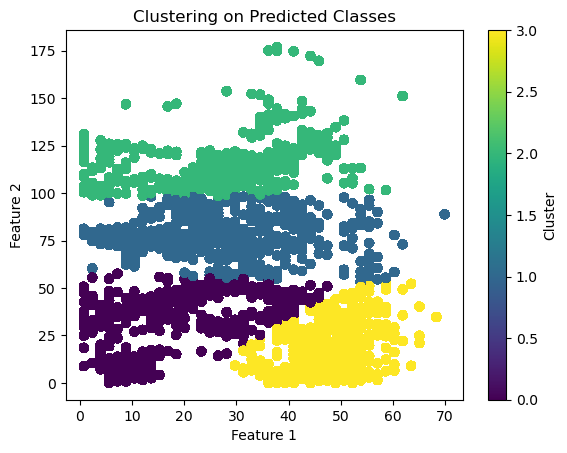

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# K-Means clustering on predicted classes
num_clusters = 4 # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_class)

# Adding cluster labels to the DataFrame
df['Cluster'] = clusters

# Visualizing the clusters (for 2D data, adjust for higher dimensions)
plt.scatter(X_class.iloc[:, 0], X_class.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering on Predicted Classes')
plt.colorbar(label='Cluster')
plt.show()


In [66]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(linearRegression_model, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')


Cross-Validation Results (Accuracy): [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [67]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(desicionTree_model, X, y, cv=kf)
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')


Cross-Validation Results (Accuracy): [0.99843835 0.99769915 0.9983791  0.99722312 0.99860794]
Mean Accuracy: 0.9980695337649681


In [68]:
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor


xgboost_model = XGBRegressor()

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(xgboost_model, X, y, cv=kf)
print(f'Cross-Validation Results (R2): {cross_val_results}')
print(f'Mean R2: {cross_val_results.mean()}')


Cross-Validation Results (R2): [0.99815559 0.9945342  0.99727451 0.9966873  0.99749086]
Mean R2: 0.9968284923411034


In [69]:
from sklearn.model_selection import cross_val_score, KFold
from lightgbm import LGBMRegressor

# Initialize LightGBM Regressor
lightgbm_model = LGBMRegressor()

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(lightgbm_model, X, y, cv=kf, scoring='r2')
print(f'Cross-Validation Results (R2): {cross_val_results}')
print(f'Mean R2: {cross_val_results.mean()}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 10
[LightGBM] [Info] Start training from score 0.565937
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [71]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import TimeSeriesSplit


# Perform time series cross-validation manually
num_splits = 5  # Number of splits for time series cross-validation
tscv = TimeSeriesSplit(n_splits=num_splits)

r2_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    r2 = r2_score(y_test_orig, predictions)
    r2_scores.append(r2)

# Print mean R2 across folds
print("Mean R-squared:", np.mean(r2_scores))


TypeError: in user code:

    File "E:\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "E:\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "E:\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "E:\anaconda\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "E:\anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "E:\anaconda\Lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=True
      • initial_state=None
